## CHURN MODEL ON TELECOM DATASET

A churn model is an analytics tools used by companies to identifiy costumers who are likely to stop using a product or a service. This allows companies to adopt marketing strategies to anticipate customer attrition.

Telephone companies use this kind of model because, predicting which customers are likely to leave, can help companies to take actions to retain them, such as offering personalized plans, discounts, or improved service. This not only reduces the high costs in acquiring new customers but also helps maintaining a stable customer base.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import google.colab
import zipfile

In [ ]:
google.colab.drive.mount('/content/drive')
PROJECT_DIR=('/content/drive/MyDrive/LAB MARKETING/')
(PROJECT_DIR + "churn-bigml-80.csv", "r")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


('/content/drive/MyDrive/LAB MARKETING/churn-bigml-80.csv', 'r')

In [ ]:
google.colab.drive.mount('/content/drive')
RAW_DATA_PATH = "/content/drive/MyDrive/LAB MARKETING/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset

In [ ]:
df_raw = pd.read_csv(RAW_DATA_PATH+'churn-bigml-80.csv')
df_raw.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
df_raw['International plan'] = np.where(df_raw['International plan'] == 'Yes', 1 , 0)

In [ ]:
df_raw['Voice mail plan'] = np.where(df_raw['Voice mail plan'] == 'Yes', 1 , 0)

# EDA ANALYSIS

In [ ]:
# break variables into categorical and numerical
categorical_cols = (df_raw.dtypes[df_raw.dtypes == 'object'].index)
numerical_cols = (df_raw.dtypes[df_raw.dtypes != 'object'].index)

In [ ]:
df_raw.describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Account length,2666.0,100.620405,39.563974,1.00,12.6500,50.000,73.0000,100.00,127.000,151.000,166.0000,193.0000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,408.000,408.0000,415.00,510.000,510.000,510.0000,510.0000,510.00
International plan,2666.0,0.101275,0.301750,0.00,0.0000,0.000,0.0000,0.00,0.000,1.000,1.0000,1.0000,1.00
Voice mail plan,2666.0,0.274944,0.446570,0.00,0.0000,0.000,0.0000,0.00,1.000,1.000,1.0000,1.0000,1.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.000,0.0000,0.00,19.000,32.000,36.0000,43.0000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,50.9250,110.400,143.4000,179.95,215.900,248.850,269.7750,302.8750,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,54.0000,74.500,87.0000,101.00,114.000,125.000,133.0000,146.3500,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,8.6585,18.770,24.3800,30.59,36.700,42.305,45.8650,51.4880,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,80.3900,135.950,165.3000,200.90,235.100,265.800,285.0250,318.8700,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,53.0000,74.000,87.0000,100.00,114.000,125.000,133.0000,147.0000,170.00


In [ ]:
for column in categorical_cols:
        print("Column: {} - Unique Values: {}".format(column, df_raw[column].unique()))
        print("="*80)

Column: State - Unique Values: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']


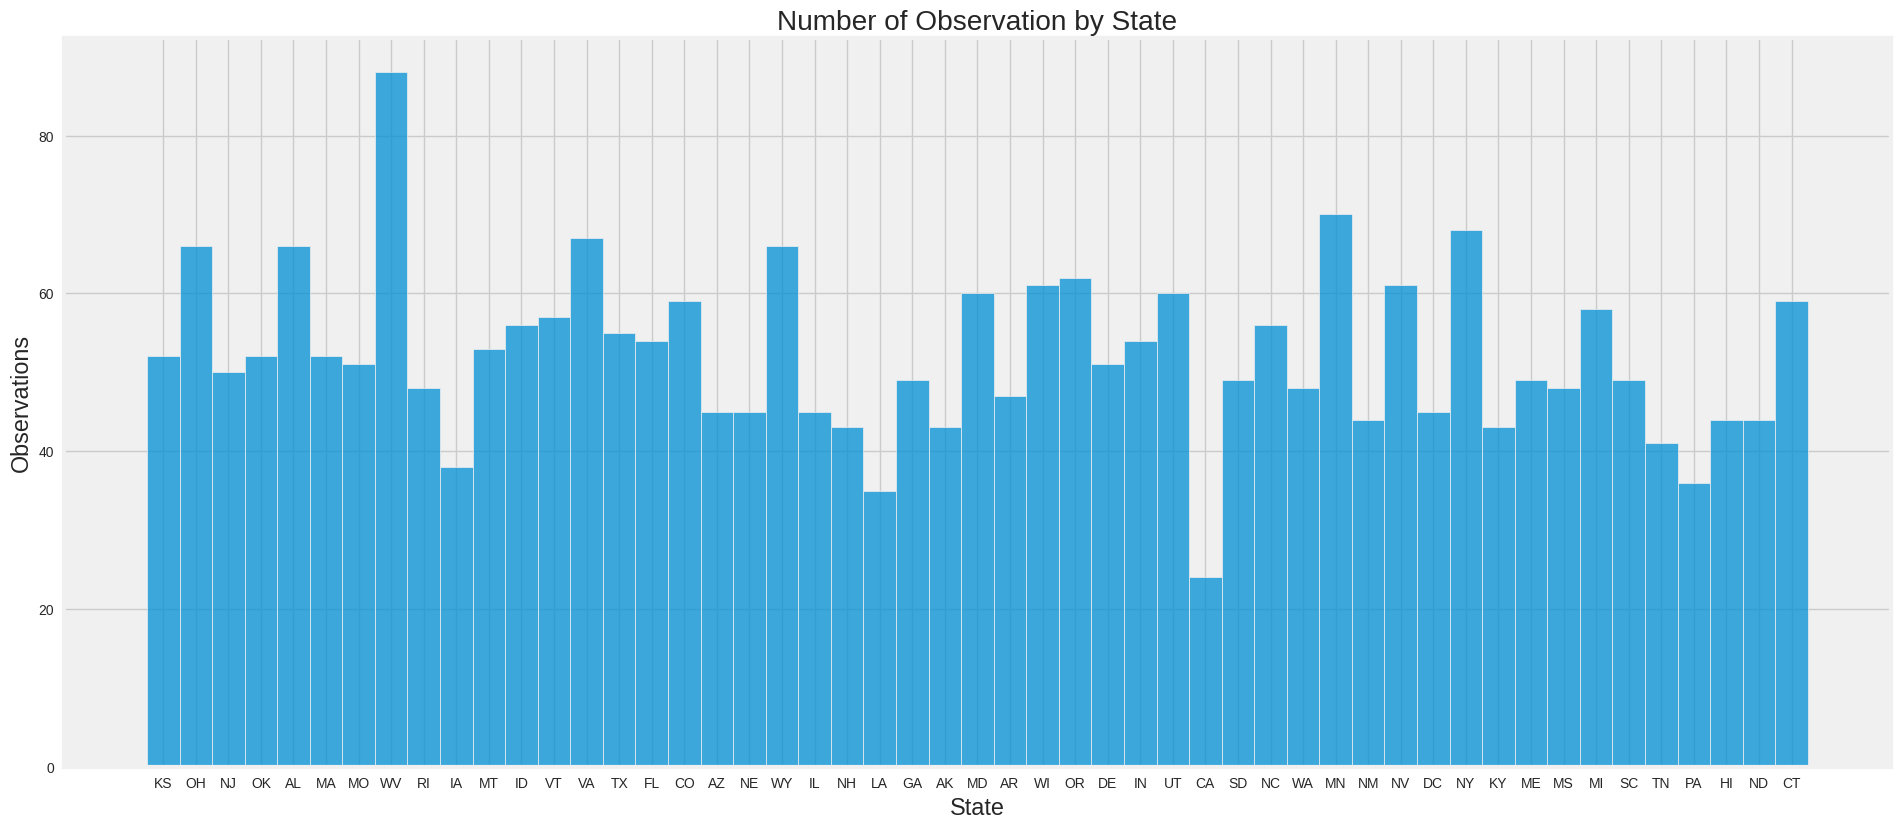

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='State', data=df_raw)
plt.xlabel('State')
plt.ylabel('Observations')
plt.title('Number of Observation by State')
plt.show()

1. Is there a relation between Customer Service Calls and Churn?

In [ ]:
df_raw[['Customer service calls','Churn']].tail(10)

,Customer service calls,Churn
2656,4,True
2657,4,True
2658,5,True
2659,2,False
2660,1,False
2661,2,False
2662,2,False
2663,3,False
2664,2,False
2665,0,False


In [ ]:
df_raw[['Customer service calls','Churn']].groupby('Churn').agg('mean')

,Customer service calls
Churn,
False,1.453029
True,2.206186


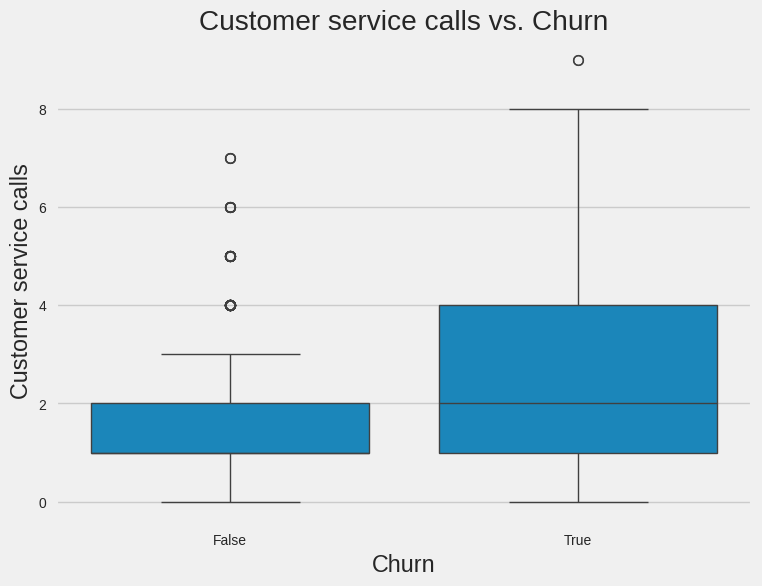

In [ ]:
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
sns.boxplot(x='Churn', y='Customer service calls', data=df_raw)
plt.xlabel('Churn')
plt.ylabel('Customer service calls')
plt.title('Customer service calls vs. Churn')
plt.show()

In [ ]:
contingecy_table = pd.crosstab(df_raw['Churn'], df_raw['Customer service calls'])
contingecy_table

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
False,476,846,546,311,69,20,7,3,0,0
True,79,99,62,37,64,29,10,5,1,2


In [ ]:
from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(contingecy_table)

In [ ]:
p_value

5.177967803990785e-56

In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypotesis. The churn of customers is influenced by the analyzed factor.")
else:
    print("Fail to reject the null hypotesis. We cannot say that the churn of customers is significantly influenced by the analyzed factor.")

Reject the null hypotesis. The churn of customers is influenced by the analyzed factor.


# DATASET CLEANING

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Removing unneccessary columns
col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge',
               'Total night charge', 'Total intl charge']

df_clean = df_raw.drop(columns = col_to_drop, axis = 1)
df_clean_test = df_raw.drop(columns = col_to_drop, axis = 1)

In [ ]:
df_clean

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,0,0,134.7,98,189.7,68,221.4,128,11.8,5,2,False
2662,192,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
2663,68,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
2664,28,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False


In [ ]:
target_col = ["Churn"]

In [ ]:
categorical_cols = (df_clean.dtypes[df_raw.dtypes == 'object'].index)
numerical_cols = [x for x in df_clean.columns if x not in categorical_cols + target_col]

In [ ]:
bin_cols = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()

In [ ]:
le = LabelEncoder()
for i in bin_cols:
    df_clean[i] = le.fit_transform(df_clean[i])
    df_clean_test[i] = le.transform(df_clean_test[i])

## CHURN MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             cohen_kappa_score, roc_auc_score, roc_curve, f1_score,
                             precision_score, recall_score, precision_recall_curve,
                             average_precision_score)
import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
y = df_clean["Churn"]
X = df_clean.drop("Churn", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
#verifico che churn abbia entrambi i valori
unique, counts = np.unique(y_test, return_counts=True)
for value, count in zip(unique, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 570
Value: 1, Count: 97


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 613 to 860
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          1999 non-null   int64  
 1   International plan      1999 non-null   int64  
 2   Voice mail plan         1999 non-null   int64  
 3   Number vmail messages   1999 non-null   int64  
 4   Total day minutes       1999 non-null   float64
 5   Total day calls         1999 non-null   int64  
 6   Total eve minutes       1999 non-null   float64
 7   Total eve calls         1999 non-null   int64  
 8   Total night minutes     1999 non-null   float64
 9   Total night calls       1999 non-null   int64  
 10  Total intl minutes      1999 non-null   float64
 11  Total intl calls        1999 non-null   int64  
 12  Customer service calls  1999 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 218.6 KB


In [ ]:
categorical_cols = (X_train.dtypes[X_train.dtypes == 'object'].index)

In [ ]:
for col in categorical_cols:
    X_train[col]=X_train[col].astype("category")

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 613 to 860
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          1999 non-null   int64  
 1   International plan      1999 non-null   int64  
 2   Voice mail plan         1999 non-null   int64  
 3   Number vmail messages   1999 non-null   int64  
 4   Total day minutes       1999 non-null   float64
 5   Total day calls         1999 non-null   int64  
 6   Total eve minutes       1999 non-null   float64
 7   Total eve calls         1999 non-null   int64  
 8   Total night minutes     1999 non-null   float64
 9   Total night calls       1999 non-null   int64  
 10  Total intl minutes      1999 non-null   float64
 11  Total intl calls        1999 non-null   int64  
 12  Customer service calls  1999 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 218.6 KB


# Extreme Gradient Boosting MODEL

In [ ]:
import xgboost as xgb
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe
from hyperopt.pyll.stochastic import sample

train_dmatrix = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)

N_FOLDS = 10

def objective(params, n_folds = N_FOLDS):
    params['objective'] = 'binary:logistic'

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(
        dtrain=train_dmatrix,
        params=params,
        nfold=n_folds,
        num_boost_round=10000,
        early_stopping_rounds=100,
        metrics="auc",
        as_pandas=True,
        seed=42
    )

    # Print the metrics
    loss = 1 - cv_results["test-auc-mean"].iloc[-1]
    n_estimators = cv_results["test-auc-mean"].idxmax() + 1
    return {'loss': loss, 'params': params, 'n_estimators': n_estimators, 'status': STATUS_OK}

In [ ]:
hyperparameter_space = {
    'n_jobs': -1,
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 0.8),
    'subsample': hp.uniform('subsample', 0.6, 0.8),
    'min_child_weight': hp.quniform('min_child_weight', 1, 7, 2),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'max_depth': hp.randint('max_depth', 1,16),
    'gamma': hp.uniform('gamma', 0.1,0.4),
    'max_delta_step': hp.randint('max_delta_step',0,10),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2))
}

In [ ]:
bayes_trials = Trials()

In [ ]:
MAX_EVALS = 15

best = fmin(fn = objective, space = hyperparameter_space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials)

100%|██████████| 15/15 [01:41<00:00,  6.75s/trial, best loss: 0.0774386069698515]


In [ ]:
best

{'colsample_bytree': 0.6865713418856028,
 'gamma': 0.12199531809975858,
 'learning_rate': 0.1016048463928349,
 'max_delta_step': 8,
 'max_depth': 14,
 'min_child_weight': 4.0,
 'reg_alpha': 0.17363180189193206,
 'reg_lambda': 0.7777438193041856,
 'subsample': 0.7757459351489759}

In [ ]:
xgb_best = xgb.XGBClassifier(**best, tree_method="hist", enable_categorical=True)

xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6865713418856028, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.12199531809975858,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1016048463928349,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=8, max_depth=14, max_leaves=None,
              min_child_weight=4.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
for col in categorical_cols:
    X_test[col]=X_test[col].astype("category")

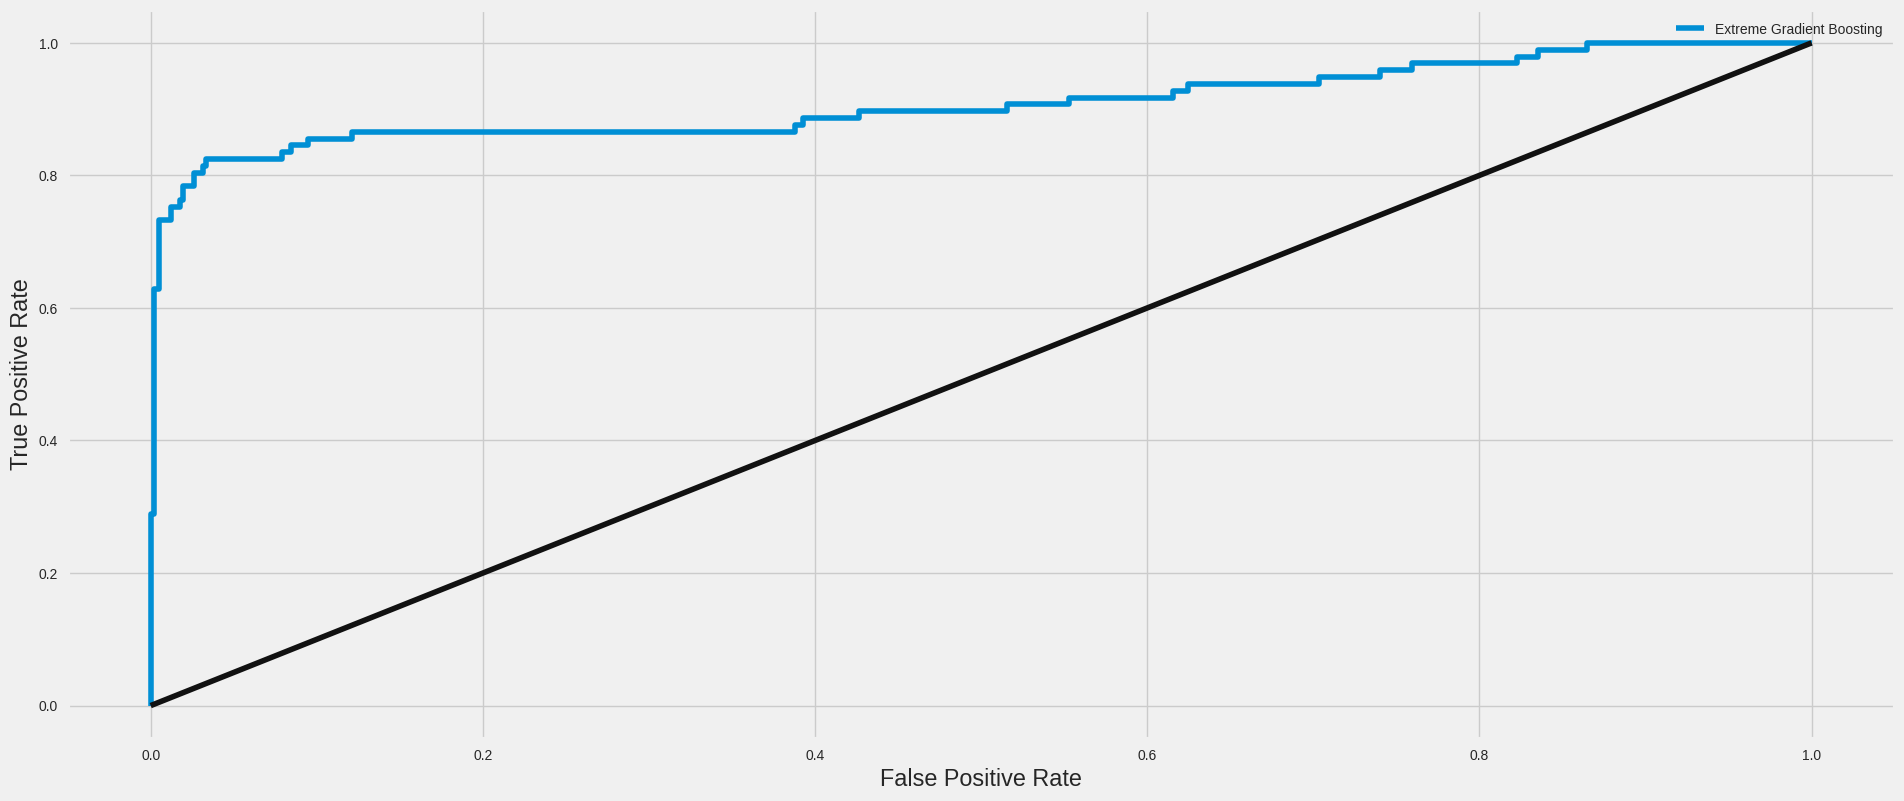

In [ ]:
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, recall_score, precision_score

def add_roc_plot(model, test_x, test_y, legend_text):
    y_pred_prob = model.predict_proba(test_x)[:, 1]
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
    plt.plot(fpr, tpr, label=legend_text)
    plt.legend()

models_list = [xgb_best]
model_names = ['Extreme Gradient Boosting']

plt.figure(figsize=(21, 9))
[add_roc_plot(model, X_test, y_test, legend_text) for model, legend_text in zip(models_list, model_names)]

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k-")
plt.show()

In [ ]:
list_scores = [roc_auc_score, recall_score, precision_score, accuracy_score]
calc_scores = []

def compute_scores(model, x_test, y_test, scores):
    return [round(score(y_test, model.predict(x_test)), 2) for score in scores]

[calc_scores.append(compute_scores(model, X_test, y_test, list_scores)) for model in models_list]

score_names = ['roc_auc', 'recall', 'precision', 'accuracy']
scores_df = pd.DataFrame(calc_scores, columns=score_names, index=model_names)

scores_df

,roc_auc,recall,precision,accuracy
Extreme Gradient Boosting,0.85,0.71,0.96,0.95


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

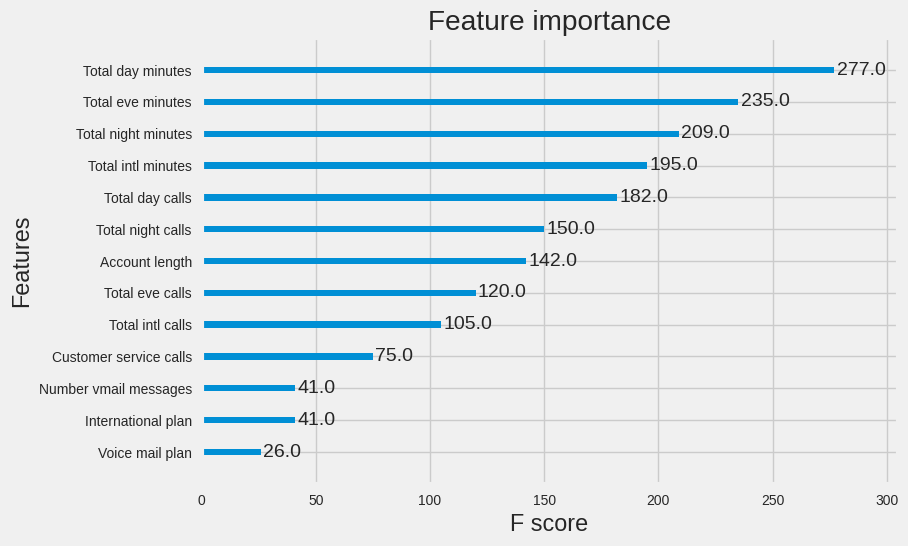

In [ ]:
xgb.plot_importance(xgb_best)

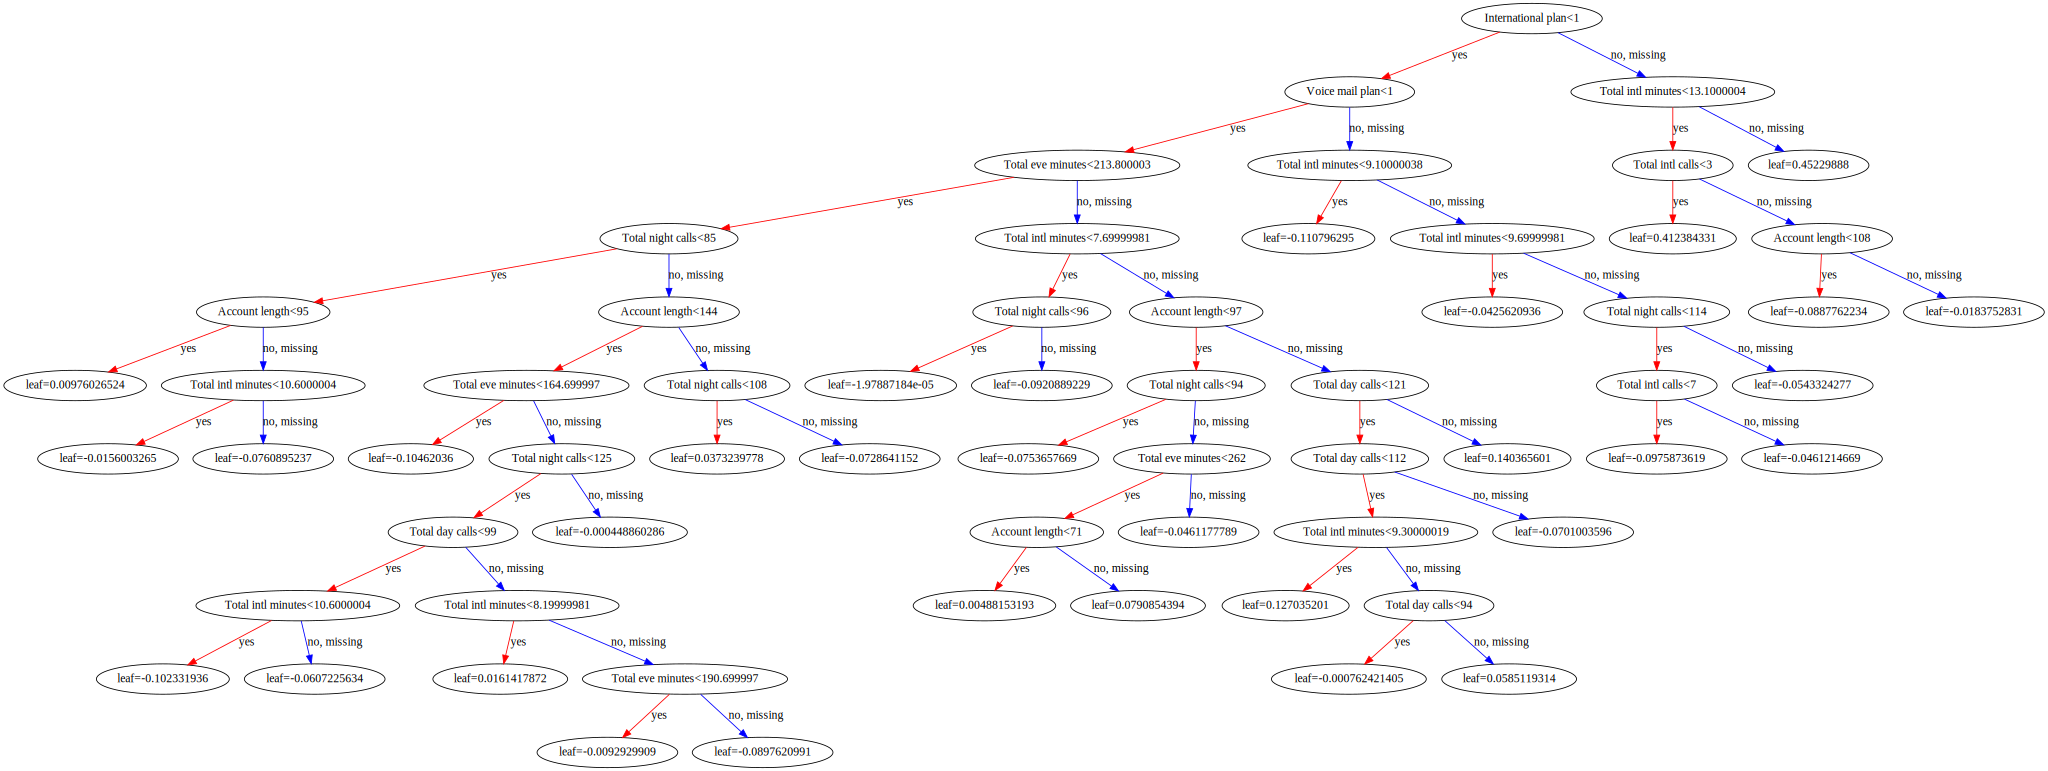

In [ ]:
xgb.to_graphviz(xgb_best, num_trees=1)

# CatBoost Model

In [ ]:
df_clean['Total day minutes'] = df_clean['Total day minutes'].astype(int)

In [ ]:
df_clean['Total eve minutes'] = df_clean['Total eve minutes'].astype(int)

In [ ]:
df_clean['Total night minutes'] = df_clean['Total night minutes'].astype(int)

In [ ]:
df_clean['Total intl minutes'] = df_clean['Total intl minutes'].astype(int)

In [ ]:
y = df_clean["Churn"]
X = df_clean.drop("Churn", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 613 to 860
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Account length          1999 non-null   int64
 1   International plan      1999 non-null   int64
 2   Voice mail plan         1999 non-null   int64
 3   Number vmail messages   1999 non-null   int64
 4   Total day minutes       1999 non-null   int64
 5   Total day calls         1999 non-null   int64
 6   Total eve minutes       1999 non-null   int64
 7   Total eve calls         1999 non-null   int64
 8   Total night minutes     1999 non-null   int64
 9   Total night calls       1999 non-null   int64
 10  Total intl minutes      1999 non-null   int64
 11  Total intl calls        1999 non-null   int64
 12  Customer service calls  1999 non-null   int64
dtypes: int64(13)
memory usage: 218.6 KB


In [ ]:
pip install catboost


In [ ]:
from catboost import CatBoostClassifier, Pool

catboost_train_data = catboost_pool = Pool(X_train, y_train, cat_features=[3,4,5,6,7,8,9,10,11,12])
catboost_test_data = catboost_pool = Pool(X_test, y_test, cat_features=[3,4,5,6,7,8,9,10,11,12])

catboost_model = CatBoostClassifier(iterations=100,
                           depth=3,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
catboost_model.fit(catboost_train_data)
# make the prediction using the resulting model
preds_class = catboost_model.predict(catboost_test_data)
preds_proba = catboost_model.predict_proba(catboost_test_data)

0:	learn: 0.3704058	total: 3.41ms	remaining: 337ms
1:	learn: 0.3535919	total: 5.94ms	remaining: 291ms
2:	learn: 0.3400112	total: 7.87ms	remaining: 255ms
3:	learn: 0.3283813	total: 9.32ms	remaining: 224ms
4:	learn: 0.3207282	total: 11ms	remaining: 209ms
5:	learn: 0.3118938	total: 12.4ms	remaining: 195ms
6:	learn: 0.3021345	total: 13.8ms	remaining: 183ms
7:	learn: 0.3005453	total: 15.3ms	remaining: 175ms
8:	learn: 0.2984365	total: 16.8ms	remaining: 170ms
9:	learn: 0.2946928	total: 18.7ms	remaining: 168ms
10:	learn: 0.2939833	total: 20.1ms	remaining: 162ms
11:	learn: 0.2918333	total: 21.4ms	remaining: 157ms
12:	learn: 0.2905159	total: 22.8ms	remaining: 153ms
13:	learn: 0.2904755	total: 24.2ms	remaining: 149ms
14:	learn: 0.2887128	total: 25.6ms	remaining: 145ms
15:	learn: 0.2885479	total: 28.4ms	remaining: 149ms
16:	learn: 0.2859807	total: 29.9ms	remaining: 146ms
17:	learn: 0.2836308	total: 32ms	remaining: 146ms
18:	learn: 0.2820056	total: 33.8ms	remaining: 144ms
19:	learn: 0.2796872	total

In [ ]:
X

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,0,1,25,265,110,197,99,244,91,10,3,1
1,107,0,1,26,161,123,195,103,254,103,13,3,1
2,137,0,0,0,243,114,121,110,162,104,12,5,0
3,84,1,0,0,299,71,61,88,196,89,6,7,2
4,75,1,0,0,166,113,148,122,186,121,10,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,0,0,134,98,189,68,221,128,11,5,2
2662,192,0,1,36,156,77,215,126,279,83,9,6,2
2663,68,0,0,0,231,57,153,55,191,123,9,4,3
2664,28,0,0,0,180,109,288,58,191,91,14,6,2


In [ ]:
pip install shap


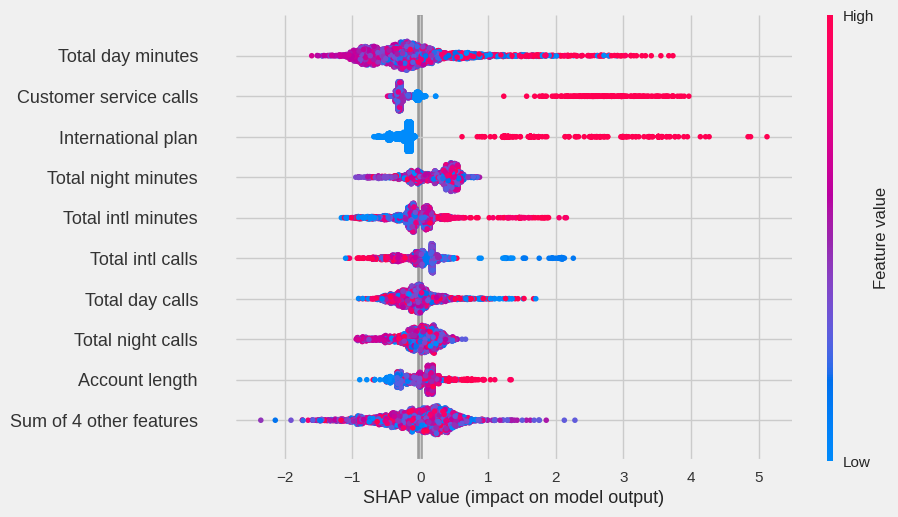

In [ ]:
import shap

# print the JS visualization code to the notebook
shap.initjs()


explainer = shap.TreeExplainer(catboost_model)
shap_values =  explainer(X,y)

shap.plots.beeswarm(shap_values)

## Logistic Regression MODEL

Accuracy Score: 0.87


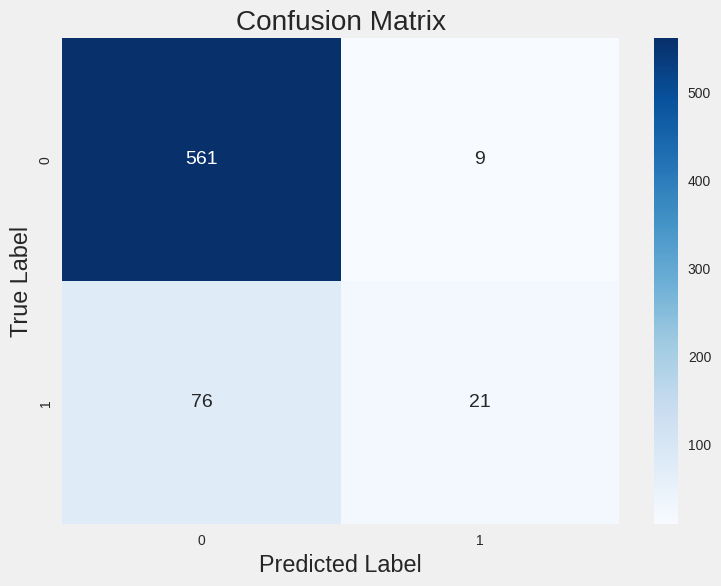

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split



# Initialize and fit the Logistic Regression model
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)
logit.fit(X_train, y_train)

# Make predictions
y_pred = logit.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_proba = logit.predict_proba(X_test)[:, 1]
recall = recall_score(y_test, y_pred)
print(f'Recall Score: {recall:.2f}')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')

Recall Score: 0.22
ROC AUC Score: 0.79


# Random Forest Model

Accuracy Score: 0.94


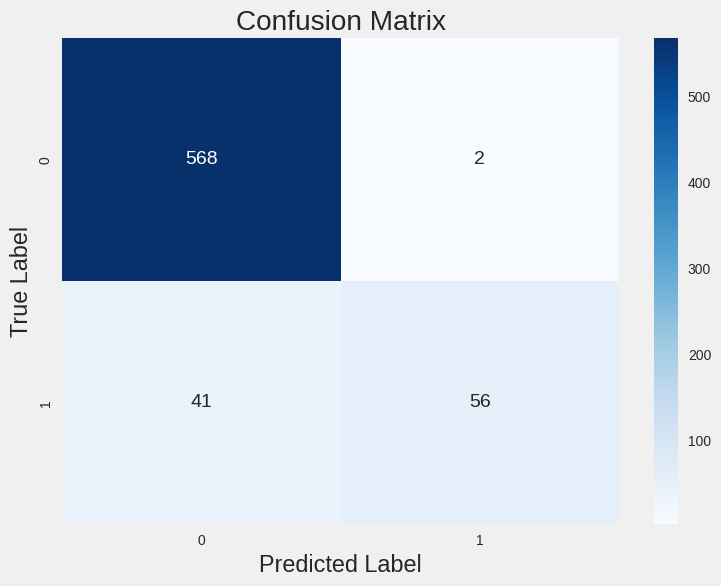

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split



rfc = RandomForestClassifier(n_estimators=100, random_state=123, max_depth=9, criterion="gini")
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_proba = rfc.predict_proba(X_test)[:, 1]
recall = recall_score(y_test, y_pred)
print(f'Recall Score: {recall:.2f}')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')

Recall Score: 0.58
ROC AUC Score: 0.91


# Comparing Models

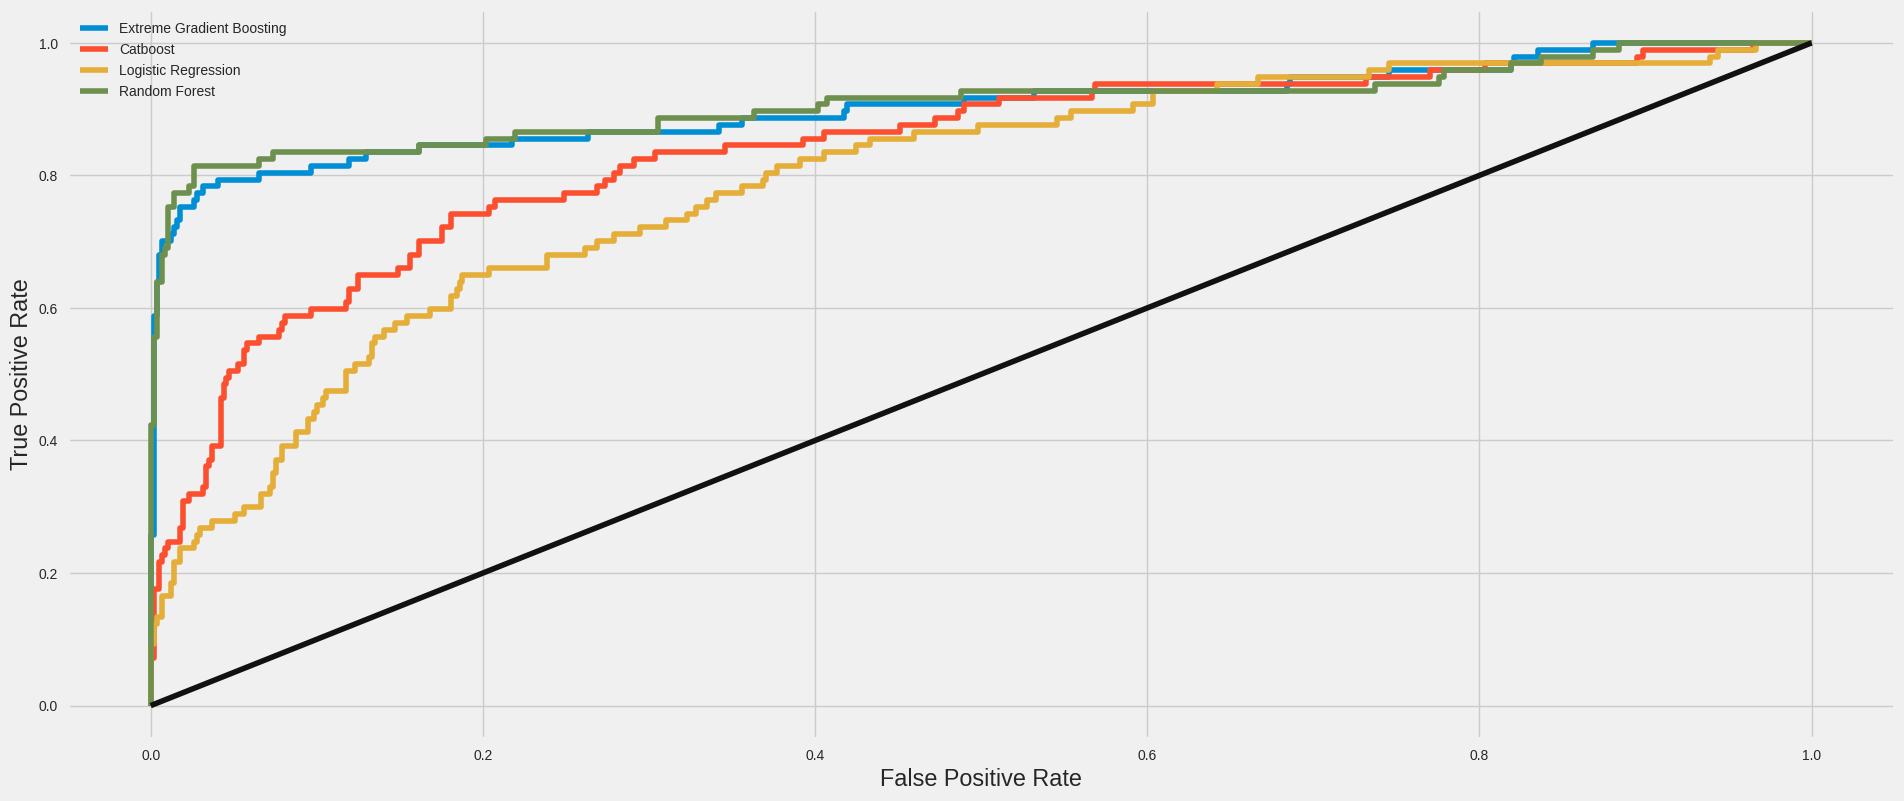

In [ ]:
models_list = [xgb_best, catboost_model, logit,rfc]
model_names = ['Extreme Gradient Boosting', 'Catboost', 'Logistic Regression', 'Random Forest']

plt.figure(figsize=(21, 9))
[add_roc_plot(model, X_test, y_test, legend_text) for model, legend_text in zip(models_list, model_names)]

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k-")
plt.show()

In [ ]:
list_scores = [roc_auc_score, recall_score, precision_score, accuracy_score]
calc_scores = []
def compute_scores(model, x_test, y_test, scores):
    return [round(score(y_test, model.predict(x_test)), 2) for score in scores]

[calc_scores.append(compute_scores(model, X_test, y_test, list_scores)) for model in models_list]

score_names = ['roc_auc', 'recall', 'precision', 'accuracy']
scores_df = pd.DataFrame(calc_scores, columns=score_names, index=model_names)

scores_df

,roc_auc,recall,precision,accuracy
Extreme Gradient Boosting,0.84,0.68,0.96,0.95
Catboost,0.71,0.46,0.64,0.88
Logistic Regression,0.60,0.22,0.70,0.87
Random Forest,0.79,0.58,0.97,0.94
